##                          Project - <span style="color: red;">House Price Prediction🏩 </span> 
**<span style="color: green;">🔍(using Decision Tree and Random Forest Machine Learning Algorithms)</span>** 




**📝<u>Description</u>:**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
**[Dataset link](https://www.kaggle.com/srikanthladda/house-price-prediction)**

The company is looking at prospective properties to buy to enter the market. **This project aims to (using Decision Tree and Random Forest Machine Learning Algorithms) predict the actual value of the prospective properties and decide whether to invest in them or not.**

**🎯<u>Business Goal</u>:**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**🔧<u>Tools Used</u>**
* <u>Libraries</u>- **scikit-learn, pandas, numpy, matplotlib**
* **Python**

### ⚡️Step1- <span style="color: green;">Import the libraries</span> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

### ⚡️Step2- <span style="color: green;">Load the data</span>
Read the house data file into a Pandas DataFrame called house_data

In [2]:
# Path of file
house_file_path = (r'C:\Users\anuja\Downloads\train.csv')
house_data = pd.read_csv(house_file_path, encoding='utf8') 

In [3]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ⚡️Step3- <span style="color: green;">Review the data</span>
* a) Using describe command to view summary statistics of the data
* b) Data check of any missing data using isnull command

In [4]:
# Data Description
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <span style="color: orange;">Interpreting Data Description</span> 
The results show 8 rows and 38 column in dataset.


* <span style="color: orange;">count</span> - shows how many rows have non-missing values.
* <span style="color: orange;">mean</span> - which is the average. 
* <span style="color: orange;">std</span> -  standard deviation, which measures how numerically spread out the values are.
* <span style="color: orange;">min</span> - smallest value is the min. 
* <span style="color: orange;">25%</span> - quarter way through the list, a number bigger than 25% and smaller than 75% of the values. 
* <span style="color: orange;">50th and 75th percentiles</span> are defined analogously
* <span style="color: orange;">max</span> -  the largest number.

In [5]:
# checking null values
house_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


### ⚡️Step4-  <span style="color: green;">Selecting Data for Modeling</span>
* a) Choosing "Features"
* b) Selecting The Prediction Target

In [6]:
# Droping columns with null values
house_clean = house_data.dropna(axis = 1)
house_clean.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### <span style="color: orange;"> a) Choosing "Features"</span>
The columns that are inputted into our model are called "features." 
**I have dropped those columns which have missing value using dropna command in a seprate dataframe house_clean.
Next I have checked all the column names and for now picked a few variables using my intuition.**

In [7]:
# Finding column names from cleaned dataset
for col in house_clean:
    print(col)

Id
MSSubClass
MSZoning
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageCars
GarageArea
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


### <span style="color: orange;">Creating X-</span><u>By convention,data of selected features is called X.</u>

In [8]:
# Create X
features = ['LotArea', 'LotShape', 'Utilities', 'OverallCond','YearBuilt','1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'PoolArea']

X = house_data[features]

### <span style="color: orange;">Interpreting Selected Features</span>
**Interpreting selected FEATURES for price prediction:**
(Features selected here based on intution and can  be done using Feature Engineering technique for more accuracy)

* <span style="color: orange;">LotArea</span> - Lot size in square feet
* <span style="color: orange;">LotShape</span> - General shape of property
* <span style="color: orange;">Utilities</span> - Type of utilities available
* <span style="color: orange;">OverallCond</span> - Rates the overall material and finish of the house
* <span style="color: orange;">YearBuilt</span> - Original construction date
* <span style="color: orange;">1stFlrSF</span> - Total First Floor area in square feet
* <span style="color: orange;">2ndFlrSF</span> - Total Second Floor area in square feet
* <span style="color: orange;">FullBath</span> - Full bathrooms above grade
* <span style="color: orange;">TotRmsAbvGrd</span> - Total rooms above grade (does not include bathrooms)
* <span style="color: orange;">PoolArea</span> - Pool area in square feet

### <span style="color: orange;"> b) Selecting The Prediction Target</span> - <u>By convention, the prediction target is called y</u>

In [9]:
# Create target object and call it y
y = house_data.SalePrice

* <b><u>SalePrice</u></b> — The property’s sale price in dollars. This is the target variable for prediction.

### <span style="color: orange;">In order to avoid error -</span> using pd.to_numeric to convert data in numeric values

In [10]:
# using pd.to_numeric to convert data in numeric values.If incompatible with conversion, reducing to NaNs
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

**to_numeric() is one of the general functions in Pandas which is used to convert argument to a numeric type. Returns: numeric if parsing succeeded. Note that return type depends on input. Series if Series, otherwise ndarray.**

### ⚡️Step5- <span style="color: green;">Building Decision Tree Regressor Model</span>

* ### <span style="color: blue;"><u>Define, Fit, Predict, Evaluate and Improve the model to get closer predictions.</u></span>

### <span style="color: teal;">✨Defining the Decision Tree Regressor Model</span>

In [11]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
house_model = DecisionTreeRegressor (random_state = 1)


### <span style="color: teal;">✨**Fitting the model**<span>

In [12]:
# Fit Model
house_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

### <span style="color: teal;">✨**Predicting the price**</span>

In [13]:
print("The predictions are")
print(house_model.predict(X.head()))

The predictions are
[208500. 181500. 223500. 128000. 250000.]


### <span style="color: teal;">✨Evaluating model quality- using Mean Absolute Error (also called MAE)</span>
<span style="color: orange;"><b>Mean Absolute Error refers to the mean of the absolute values of each prediction error on all instances of the data-set.</b></span>

**Prediction Error → Actual Value - Predicted Value**

**Absolute Error → |Prediction Error|**

**MAE = Average of All absolute errors**

<br>Let's calculate MAE.</br>

👉**Calculating MAE for In-sample data**

In [14]:
predicted_home_prices = house_model.predict(X)
val_in_sample = mean_absolute_error(y, predicted_home_prices)
print("Validation MAE for in-sample data: {:,.0f}".format(val_in_sample))

Validation MAE for in-sample data: 6,842


### <span style="color: green;">IN-SAMPLE SCORE : 6,842</span>

👉**Calculating MAE for Out-of-Sample data**
Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. So-
* Split data into training and validation data using scikit-learn library function train_test_split
* Here I am giving numeric value as 1 to random_state argument to get same split every time

In [15]:
# Make Validation prediction and calculate mean absolute error
val_predictions = house_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 27,254


### <span style="color: green;">OUT-OF-SAMPLE SCORE : 27,254 </span>

Our mean absolute error for the in-sample data was about 7,000 dollars. Out-of-sample it is more than 27,000 dollars.
There are many ways to improve this model, such as experimenting to find better features or different model types.

### <span style="color: teal;">✨Improving Model</span>
A Model can suffer from either:
* <b>Overfitting:</b> capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
* <b>Underfitting:</b> failing to capture relevant patterns, again leading to less accurate predictions.
<br>**For accuracy on new data,we want to find a point between underfitting and overfitting. Visually, we want the low point of the validation curve.**</br>
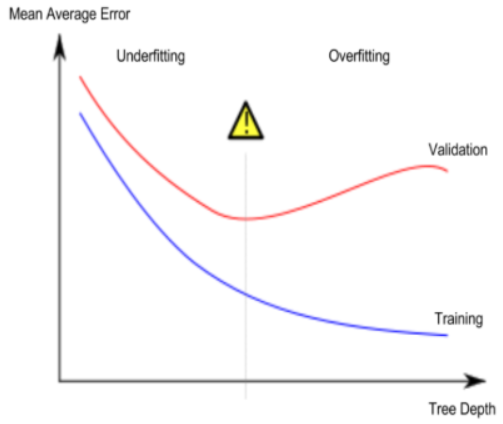


Let's optimize the size of the tree to make better predictions in order to improve the model.
* <b>Defining a utility function to help compare MAE scores from different values for max_leaf_nodes</b>

In [16]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return (mae)

* <b>Using a for-loop to compare the accuracy of our model built with different values for max_leaf_nodes</b>

In [17]:
# comparing MAE with different max leaf nodes in order to increase the accuracy of model
for max_leaf_nodes in [5, 25, 50, 100, 150, 200, 250, 500]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 35044
Max leaf nodes: 25 		 Mean Absolute Error: 28579
Max leaf nodes: 50 		 Mean Absolute Error: 27134
Max leaf nodes: 100 		 Mean Absolute Error: 25965
Max leaf nodes: 150 		 Mean Absolute Error: 26004
Max leaf nodes: 200 		 Mean Absolute Error: 25437
Max leaf nodes: 250 		 Mean Absolute Error: 25850
Max leaf nodes: 500 		 Mean Absolute Error: 27272


**The optimal value for max leaf nodes = 200**

In [18]:
# Make Validation prediction and calculate mean absolute error
val_predictions = house_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
final_house_model = DecisionTreeRegressor(max_leaf_nodes=200, random_state=1)
final_house_model.fit(train_X, train_y)
val_predictions = house_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 27,254
Validation MAE for best value of max_leaf_nodes: 27,254


Here both scores are matching. However this is not case in every dataset and it is one of the way to improve our model by taking optimal value for max leaf nodes while fitting the final model.

### 💡<span style="color: red;">Final House Price Predictions using Decision Tree Regressor Model</span>

* <b>Fit Model Using All Data</b>
We know the best tree size. If this model is going to deploy in practice, make it even more accurate by using all of the data and keeping that tree size. That is, now there is no need to hold out the validation data which helped in maling all the modeling decisions.

In [19]:
# Fit the model with best_tree_size
final_house_model = DecisionTreeRegressor(max_leaf_nodes=200, random_state=1)

# fit the final model
final_house_model.fit(X, y)

print("Predicted_price:", final_house_model.predict(X.head()))
print("Sale Price:", y.head().tolist())

Predicted_price: [209133.65384615 171791.66666667 209133.65384615 130209.66666667
 268414.28571429]
Sale Price: [208500, 181500, 223500, 140000, 250000]


### <span style="color: teal;">✨Further Evaluating Final Decision Tree model quality- <u>using Mean Absolute Percent Error (MAPE) </span></u>
<span style="color: orange;"><b>Mean Absolute Error refers to the mean of the absolute values of each prediction error on all instances of the data-set.</b></span>
**Comparing predicted values with the actual values by calculating the error using measures such as the "Mean Absolute Percent Error" (MAPE) 

**For example**
**<br><span style="color: red;">If your MAPE is less than 10% then it's a reasonable model.</span></br>**

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
y_true = (y.head().tolist()); y_pred = final_house_model.predict(X.head())

mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percent Error (MAPE) for Decision Tree Model is", mean_absolute_percentage_error(y_true, y_pred))


Mean Absolute Percent Error (MAPE) for Decision Tree Model is 5.2879119195090665


### ✏️<u>Observations 1</u> 
* **We get the Decision Tree Model for prediction of house prices with MAE value 27,254 and Mean Absolute Percent Error (MAPE) is 5.28**


* **After tuning and improving the <span style="color: red;"><u>Decision Tree Regressor Model</u></span>, let's make predictions on same data using another model which is <span style="color: red;"><u>Random Forests Model</u></span> to improve our predictions even more.**

* <br>**<span style="color: red;"><u>Decision Tree Regressor Model -</u></span>** leave us with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.</br>

   But, many other models can lead to better performance. 

* **<span style="color: red;"><u>Random Forests Model -</u></span>** uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

### ⚡️Step6- <span style="color: green;">Building Random Forests Model</span>

* ### <span style="color: blue;"><u>Define, Fit, Predict, Evaluate the model to get closer predictions.</u></span>

**A Random Forest Model is built similarly to a decision tree in scikit-learn by using RandomForestRegressor class.**

### <span style="color: teal;">✨Define and Fit Random Forest model quality</span>

In [22]:
# Random Forest Model
house_forest_model = RandomForestRegressor(random_state=1)
house_forest_model.fit(train_X, train_y)
house_preds = house_forest_model.predict(val_X)
house_mae = mean_absolute_error(val_y, house_preds)
print("Validation MAE for Random Forest Model: {}".format(house_mae))

Validation MAE for Random Forest Model: 21056.138748858448


**👍<span style="color: purple;">The Random Forest has improved our model. Earlier MAE was 27254 using Decision Tree and now with Random Forest it's around 21056.</span>**

### <span style="color: teal;">✨Predict using Random Forest Model </span>
Applying Random Forest Model to all data in order to present model as more accurate candidate for deployment

In [23]:
# Define the model 
final_forest_model = RandomForestRegressor(random_state=1)

# fit the final model
final_forest_model.fit(X, y)

print("Predicted_price:", final_forest_model.predict(X.head()))
print("Sale Price:", y.head().tolist())

Predicted_price: [207670.6  177519.   221117.5  135595.62 260294.68]
Sale Price: [208500, 181500, 223500, 140000, 250000]


### <span style="color: teal;">✨Evaluating Random Forest model quality- <u>using Mean Absolute Percent Error (MAPE) </span></u>
<span style="color: orange;"><b>Mean Absolute Error refers to the mean of the absolute values of each prediction error on all instances of the data-set.</b></span>
**Comparing predicted values with the actual values by calculating the error using measures such as the "Mean Absolute Percent Error" (MAPE) 

**For example**
**<br><span style="color: red;">If your MAPE is less than 10% then it's a reasonable model.</span></br>**

In [24]:
y_true = (y.head().tolist()); y_pred = final_forest_model.predict(X.head())

mean_absolute_percentage_error(y_true, y_pred)
print("Mean Absolute Percent Error (MAPE) for Random Forest Model is", mean_absolute_percentage_error(y_true, y_pred))


Mean Absolute Percent Error (MAPE) for Random Forest Model is 2.1842070869505714


**Measuring Decision Tree performance using scatterplot**

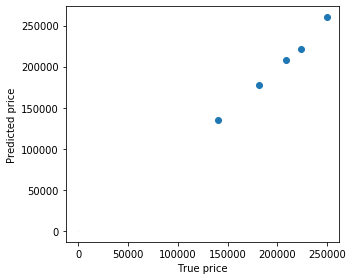

In [25]:
predicted = final_forest_model.predict(X.head())
expected = y.head()

#Plot predicted as a function of expected


plt.figure(figsize=(5, 4))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

### ✏️<u>Observations 2</u> 
**We get the Random Forest Model for prediction of house prices with MAE value 21,056 which is a big improvement over the best decision tree error of 27,254 and Mean Absolute Percent Error (MAPE) for Random Forest Model is 2.18 which is good from Decision Tree Model which is 5.28**

There are parameters which allow us to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

### ⚡️Step7- <span style="color: green;">Checking Accuracy and Score of Both Models</span>

**(using .score command and scatterplot)**

### **<span style="color: green;"><u>model.score()</span></u>** : for classification or regression problems, 
### <span style="color: red;">Model Scores are between 0 and 1, with a larger score indicating a better fit.</span>

In [26]:
# Fit the model with best_tree_size
final_house_model = DecisionTreeRegressor(max_leaf_nodes=200, random_state=1)

# fit the final model
final_house_model.fit(X, y)

print("Final Score for Decision Tree Model", final_house_model.score(X, y))

Final Score for Decision Tree Model 0.9627548610801088


In [27]:
# define the model 
final_forest_model = RandomForestRegressor(random_state=1)

# fit the final model
final_forest_model.fit(X, y)

# score the final model
print ("Final Score for Random Forest Model", final_forest_model.score(X, y))

Final Score for Random Forest Model 0.9747422507679872


### <span style="color: fuchsia;">Model Score for Random Forest Model 0.9747422507679872</span>
### <span style="color: fuchsia;">Final Score for Decision Tree Model 0.9627548610801088</span>
**So Random Forest Model score indicate it as a good fit**

# <span style="color: maroon;">Conclusion</span>✒️
<b><span style="color: green;">There were two models tried - Random Forest Regression and Decision Tree Regression. Based on <u><span style="color: red;">Mean Absolute Error (MAE)</span></u> which is 21056 and <u><span style="color: red;">Mean Absolute Percent Error (MAPE)</span></u> which is 2.1842070869505714 ,and <u><span style="color: red;">Model Score</span></u>  for Random Forest Model which is 0.9627548610801088;</span>
    
  <b><span style="color: olive;">I conclude Random Forest Model is better option with around 90% accuracy for prediction of the actual value of the prospective properties and help Company to decide whether to invest in them or not.</span></b>


  <br><b><span style="color: green;">However Feature Engineering and other models such as XGBoost provides more accuracy when tuned well. In this case, Random Forest Model can be concluded as best.</span></br>